<a href="https://colab.research.google.com/github/torimonn/hands-on/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B3%E3%83%B3%E3%83%9A%E5%8B%89%E5%BC%B7%E4%BC%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **利用するライブラリを準備**

In [1]:
#　ライブラリのインストール
!pip install google-generativeai

In [2]:
# ライブラリのインポート
import google.generativeai as genai # 生成AIモデルのGeminiを利用するためのコード
from google.colab import userdata # 環境変数からAPIキーを取得するためのコード

# **APIキーの設定**
●事前に行うこと

・https://ai.google.dev/aistudio?hl=ja　にアクセスしてログイン
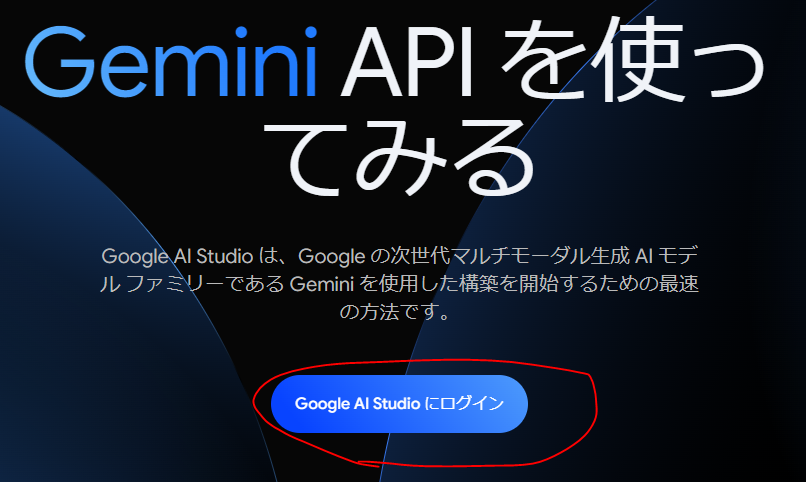

・Get API Key →　APIキーを作成　でAPIキーを作成し、作成したAPIキーをコピー　プロジェクト名は適当でOK、APIキーは公開したりせず扱いに注意する
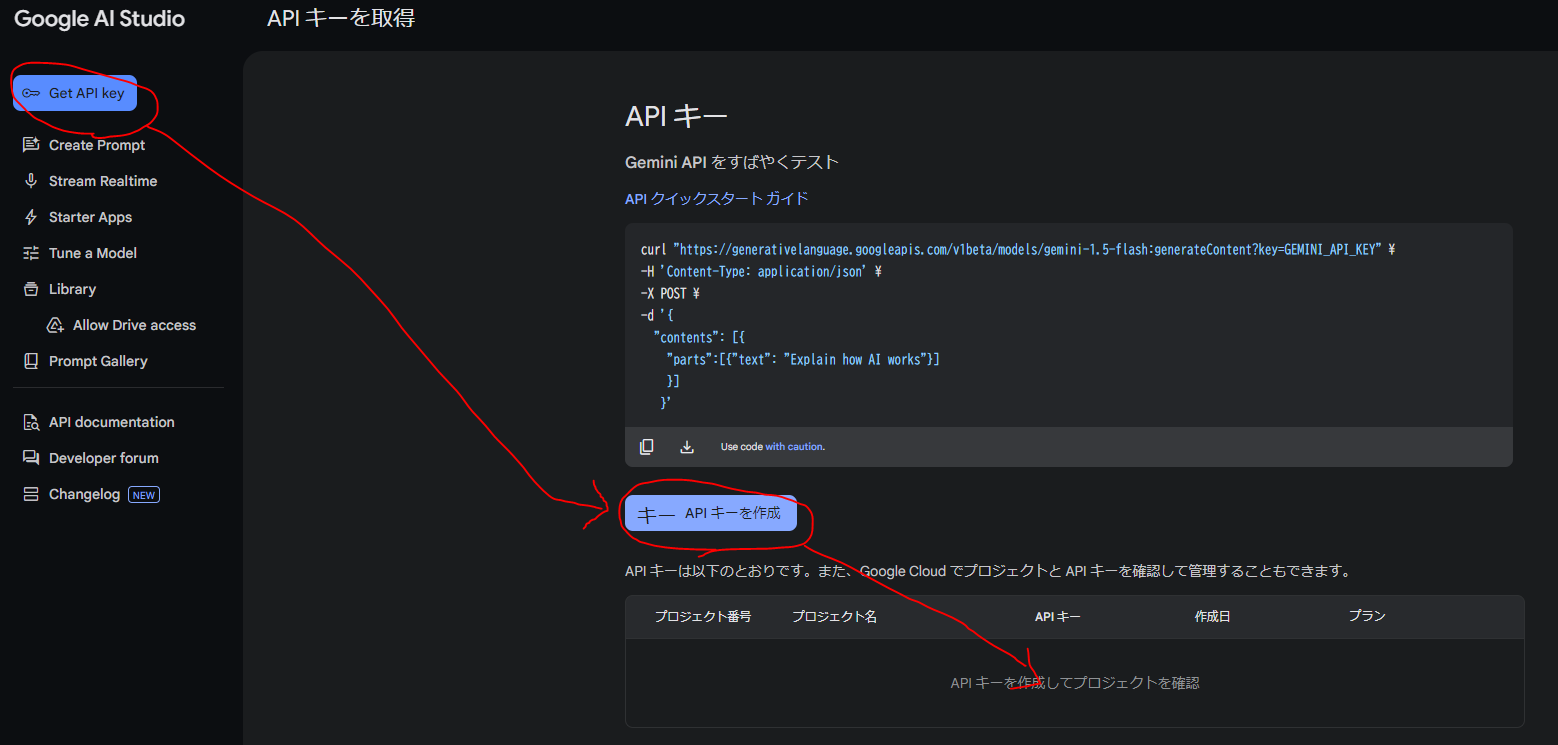

・Googleコラボの画面で、画面左の鍵のアイコンを選択→GeminiAPIキーをクリックしてインポート
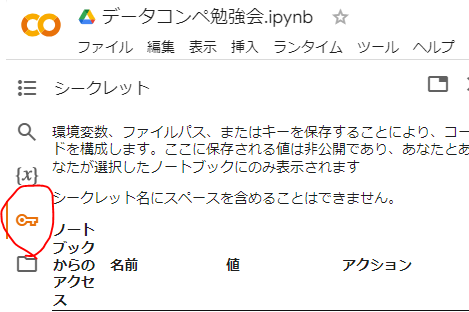

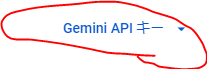!

In [3]:
# APIキーの設定
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')# GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納
genai.configure(api_key=GOOGLE_API_KEY)# GOOGLE_API_KEYをAPIキーとして設定

TimeoutException: Requesting secret GOOGLE_API_KEY timed out. Secrets can only be fetched when running from the Colab UI.

# **Geminiにメッセージを送信して回答を生成**

In [ ]:
# Geminiにテキスト送信→Geminiが生成したテキストを表示

model = genai.GenerativeModel("gemini-1.5-flash")# gemini-1.5-flashをモデルに設定
response = model.generate_content("こんにちは！！面白いジョークを言って！")# 設定したモデルに（）内のデータを送信、モデルが生成して回答してきたデータをresponseに格納

# printは、()内のデータを表示するメソッド
print("--Geminiからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--")
print(response.text) # .textは、”import google.generativeai as genai”のコードを呼び出すメソッドで、テキスト表示処理をしてくれる
print("--Geminiから返ってきたデータ--")
print(response)# モデルが生成して回答してきたデータをそのまま表示

# **ここからハンズオン開始**

In [ ]:
#　ライブラリのインストール
!pip install chromadb google-generativeai PyMuPDF # chromadb・google-generativeai・PyMuPDFのデータをインストール

In [ ]:
# ライブラリのインポート
import google.generativeai as genai # 生成AIモデルのGeminiを利用するためのコード
from google.colab import userdata   # 環境変数からAPIキーを取得するためのコード
import os
from google.colab import files      # ファイルアップロードのためのライブラリ
import fitz                         # PyMuPDF - PDFからテキストを抽出するライブラリ
import chromadb                     # ベクトルデータベースChromaDBのライブラリ

In [ ]:
# APIキー・生成AIモデル・ベクトルデータ変換用モデルの設定
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')                        # GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納
genai.configure(api_key=GOOGLE_API_KEY)                                # GOOGLE_API_KEYをAPIキーとして設定
model = genai.GenerativeModel("gemini-1.5-flash")                      # gemini-1.5-flashを生成AIモデルに設定
embed_model = "models/text-embedding-004"       # models/text-embedding-004をベクトルデータ変換用モデルに設定

In [ ]:
# Geminiにテキスト送信→Geminiが生成したテキストを表示
response = model.generate_content("投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日は？")# 設定したモデルに（）内のデータを送信、モデルが生成して回答してきたデータをresponseに格納

# printは、()内のデータを表示するメソッド
print("--Geminiからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--")
print(response.text) # .textは、”import google.generativeai as genai”のコードを呼び出すメソッドで、テキスト表示処理をしてくれる

# **検索対象のドキュメントをアップロード**
↓のアドレスにアクセスしてPDFファイルをダウンロードする

https://hamamatsu-iwata.jp/notice/docs/20241220_toushinIS_denshi.pdf

In [ ]:
# PDFファイルのアップロード　https://hamamatsu-iwata.jp/notice/docs/20241220_toushinIS_denshi.pdf
uploaded = files.upload()  # from google.colab import userdata　を利用してPDFをアップロードする
# files.upload()でアップロードファイルは辞書型の変数に格納される
# 例：アップロードしたファイルが「sample.pdf」の場合
# uploaded = {"sample.pdf"（辞書のキー）: b"%PDF-1.4...（辞書の値）"}　　辞書のキー：アップロードしたファイル名（例："sample.pdf"）　辞書の値：バイト形式のファイルデータ

# アップロードされたファイル名を取得する例
for filename in uploaded.keys():
    print(f"アップロードされたファイル: {filename}")

# **アップロードしたPDFからテキストデータを抽出する処理**

In [ ]:
# PDFファイルからテキストデータを抽出する処理
pdf_texts = []  # PDFから抽出したテキストを格納するリスト

# PDFファイルを1つずつ処理してテキストを抽出
for filename in uploaded.keys():      # for は「繰り返し処理を行う」ための構文　uploadedに格納されている辞書型のデータから.keysメソッドで辞書のキーを1つずつ取得して繰り返し処理を行っている
    with fitz.open(filename) as doc:  # withは「開始と終了処理を実行する」ための構文　ここでは、fitz.open()で()内の辞書のキーからファイルを開き、docに格納する処理とそのファイルを閉じる処理を行っている
        text = ""                     # テキストを格納するための空の変数を作る
        for page in doc:              # docに格納したPDFから1ページ毎pageとして取り出し繰り返し処理
            text += page.get_text()   # pageから.get_text()でテキストを抽出し、textに追加する　 += は「文字列を結合する」という意味で、既存の text に新しいテキストが加えている
        pdf_texts.append(text)        # PDFごとに抽出したテキストをpdf_textsリストに格納　.appendはリストに追加するメソッド

# **抽出したテキストを分割する処理**

In [ ]:
# テキストを500文字ごとに分割する関数
def chunk_text(text, chunk_size=500):    # def は関数を定義するための構文。ここでは chunk_text という名前の関数を定義していて、あとでchunk_textを関数として使う
                                         # （）の中の記載は、この関数を使うときに必要なデータの形を定義しているもの　text: 分割対象のテキストデータ　と　# chunk_size: 分割する文字数（デフォルトは500文字）を定義している

    chunks = []                          # 分割したテキストを格納するリストを用意

    # 0からテキストの長さまで、chunk_sizeずつ繰り返す処理
    for i in range(0, len(text), chunk_size):  # rangeは（）内の値の範囲内を定義している　lenは（）内のデータの数を計算する処理　ここでは、0から、len(text)→テキストの文字数　までを　chunk_sizeの単位で繰り返し処理
        chunk = text[i:i+chunk_size]           # i文字目からi+chunk_size文字目までをchunkに格納
        chunks.append(chunk)                   # chunkをリストに格納
    return chunks                              # returnは関数を実行した時に帰ってくる値を定義するもの　つまり、chunk_text関数にtextとchunk_size（chunk_sizeは任意）のデータを投げると、諸々の処理を行った後chunksというリストが返ってくる

# **テキストをベクトルデータに変換してデータベースに保存する処理**

In [ ]:
# ChromaDBのクライアントを作成
client = chromadb.Client()                                  # データベースを操作するためのコードを準備
collection = client.create_collection(name="pdf_collection")# 準備したclientで.create_collectionというメソッドを使ってベクトルデータを保存する入れ物みたいなものを作っている

# PDFテキストを500文字ごとに分割してChromaDBに保存
doc_id = 1                     # 分割した単位で番号を割り振るためにdoc_idに1を格納
for text in pdf_texts:         # PDFごとに抽出したテキストを格納したpdf_textsリストから、PDF単位でデータをtextとして取得し繰り返し処理
    chunks = chunk_text(text)  # textをchunk_text関数を使って500文字に分割、chunk_sizeを入力していないのでデフォルトの500文字で分割される　returnされたデータ（分割されたテキストを格納したリスト）をchunksに格納
    for chunk in chunks:       # chunksからchunkを1つずつ取り出し繰り返し処理

        # テキストをベクトルに変換
        embedding_data = genai.embed_content(embed_model, chunk)# テキストデータのchunkをベクトルデータに変換するモデルembed_modelにgenai.embed_contentで送信してベクトルデータに変換
        print(embedding_data)
        embedding = embeddings["embedding"] # 変換後のデータから["embedding"]でベクトル部分のみを取り出す

        # ベクトルと元のテキストをChromaDBに追加
        collection.add(embeddings=[embedding], documents=[chunk], ids=[str(doc_id)]) # collectionに　embeddings：ベクトルデータ、documents：テキストデータ、ids：割り振る番号　を追加
        doc_id += 1                                                                  # 割り振る番号 に1を足して次の番号に更新する処理

In [ ]:
# データベースの中身を確認
all_data = collection.get()  # すべてのデータを取得
print(all_data)

# **質問に対応するテキストをデータベースから検索してくる処理**

In [ ]:
# 質問を設定
query = "投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日は？"
query_embedding = embed_model.embed_content(embed_model,query)["embedding"] # 質問をテキストデータからベクトルデータに変換

# ベクトル化したデータで類似のベクトルデータを検索し、結果を出力
results = collection.query(query_embeddings=[query_embedding], n_results=1)  # collectionから.queryメソッドで検索　query_embeddingsは検索方法をベクトル検索に指定するもの、n_resultsは検索して取得する件数の設定
print(results)

In [ ]:
# 取得した検索結果をGeminiに渡して回答を生成
response = model.generate_content(f"以下の情報を参考に質問に答えてください: {results['documents'][0]} 質問: {query}") # 取得した検索結果からテキストデータを取り出して、元の質問を合わせて生成AIに回答生成させる
# f"" は「f-string」と呼ばれる文字列フォーマットで、{}内の変数を文字列に埋め込む仕組み。
# 以下の情報を参考に質問に答えてください: ここは定型文、プロンプトテンプレート的な箇所
# {results['documents'][0]} ここは検索結果
# 質問: {query} ここは質問文

print("--Geminiに送信するデータ--")
print(f"以下の情報を参考に質問に答えてください: {results['documents'][0]} 質問: {query}")
print("--Geminiが生成したテキストデータ--")
print(response.text)